In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Conv2D, Conv2DTranspose
from keras.models import Model
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [2]:
####################################
# train 데이터 load
####################################
# train set load
train_dataset = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/train_failure10_4.csv', header=0)
id_cycle = train_dataset.iloc[:,[0,1]]
id_cycle.columns = ['id','cycle']
label = train_dataset.iloc[:,-1]
label.columns = ['label']

In [8]:
train_array = train_dataset.iloc[:,2:-1]    # train_array: 분석 대상 데이터
print(train_array.shape)
train_array[:10]

(49385, 24)


,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
5,34.9996,0.8400,100.0,449.44,554.77,1352.87,1117.01,5.48,7.97,193.82,...,181.90,2387.87,8054.10,9.3346,0.02,330,2223,100.00,14.91,8.9057
6,0.0019,0.0001,100.0,518.67,641.83,1583.47,1393.89,14.62,21.58,552.45,...,520.48,2387.89,8127.92,8.3960,0.03,391,2388,100.00,38.93,23.4578
7,41.9981,0.8400,100.0,445.00,549.05,1344.16,1110.77,3.91,5.69,137.13,...,129.65,2387.97,8075.99,9.3679,0.02,329,2212,100.00,10.55,6.2787
8,42.0016,0.8400,100.0,445.00,549.55,1342.85,1101.67,3.91,5.70,138.02,...,129.65,2388.00,8071.13,9.3384,0.02,328,2212,100.00,10.63,6.3055
9,25.0019,0.6217,60.0,462.54,536.35,1251.91,1041.37,7.05,9.01,174.70,...,164.08,2028.13,7869.41,10.9141,0.02,305,1915,84.93,14.34,8.6119


In [10]:
train_mean = np.mean(train_array, axis =0)
train_max = np.max(train_array, axis =0)
train_min = np.min(train_array, axis =0)
valid_col_list = []
for i in range(train_array.shape[1]):
    if train_mean[i]/1000 < train_max[i] - train_min[i]:
        valid_col_list.append(i)
print("분석에 사용할 변수 개수: ", len(valid_col_list))
train_array = train_array.iloc[:,valid_col_list]    # train_array : constant 걸러냄
print(valid_col_list)
train_array[:10]

분석에 사용할 변수 개수:  24
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
5,34.9996,0.8400,100.0,449.44,554.77,1352.87,1117.01,5.48,7.97,193.82,...,181.90,2387.87,8054.10,9.3346,0.02,330,2223,100.00,14.91,8.9057
6,0.0019,0.0001,100.0,518.67,641.83,1583.47,1393.89,14.62,21.58,552.45,...,520.48,2387.89,8127.92,8.3960,0.03,391,2388,100.00,38.93,23.4578
7,41.9981,0.8400,100.0,445.00,549.05,1344.16,1110.77,3.91,5.69,137.13,...,129.65,2387.97,8075.99,9.3679,0.02,329,2212,100.00,10.55,6.2787
8,42.0016,0.8400,100.0,445.00,549.55,1342.85,1101.67,3.91,5.70,138.02,...,129.65,2388.00,8071.13,9.3384,0.02,328,2212,100.00,10.63,6.3055
9,25.0019,0.6217,60.0,462.54,536.35,1251.91,1041.37,7.05,9.01,174.70,...,164.08,2028.13,7869.41,10.9141,0.02,305,1915,84.93,14.34,8.6119


In [11]:
#new_cols = [i for i in range(0,train_array.shape[1])]
#train_array.columns = new_cols
train_array.head()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


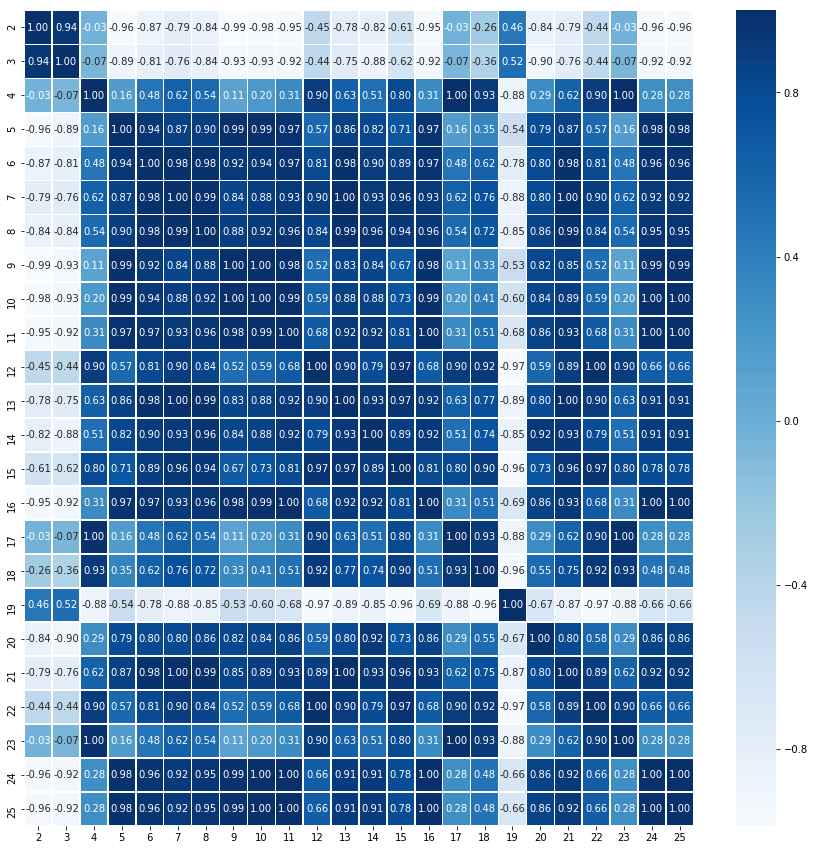

In [12]:
corr = train_array.iloc[:,].corr()

plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [31]:
corr_id = corr.index.to_list()

In [56]:
dup = []
for i in range(len(corr_id)):
    for j in range(i+1,len(corr_id)):
        if abs(corr.iloc[i,j]) > 0.95: 
            dup.append(int(corr_id[j]))
np.unique(dup)

array([ 5,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25])

In [92]:
cols = train_array.columns.tolist()
uniq_col = [i for i in cols if i not in dup]
print(uniq_col)

[1, 12, 18, 19, 20, 21, 23]


In [93]:
train_uniq = train_array[uniq_col]

In [94]:
dataset = pd.concat([id_cycle, train_uniq,label],axis=1)
dataset.head()

,id,cycle,1,12,18,19,20,21,23,label
0,1,1,0.8400,1.01,0.02,330,2212,100.00,6.3670,0
1,1,2,0.7002,1.07,0.02,361,2324,100.00,14.6552,0
2,1,3,0.8409,1.01,0.02,329,2212,100.00,6.4213,0
3,1,4,0.8400,1.02,0.02,328,2212,100.00,6.4176,0
4,1,5,0.6207,0.93,0.02,305,1915,84.93,8.6754,0


In [95]:
# 정상 데이터만 추출
train_seq_T = dataset[dataset['label']==0]
#train_seq_T = train_seq_T[train_seq_T['cycle'] >= 10]    # 초반 10개 값 제외  #하면 초반까지 이상으로 잡아버림. 따라서 하면 안됨
print("정상 데이터 shape: ", dataset.shape)

정상 데이터 shape:  (48658, 10)


In [96]:
### 데이터 스케일 조정
X_train = np.asarray(train_seq_T[uniq_col])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))

print("훈련에 사용할 데이터 shape: ", X_train.shape)

훈련에 사용할 데이터 shape:  (42688, 7, 1, 1)


In [24]:
"""
for i in range(train_uniq.shape[1]):
    #if np.max(train_array[:,i] - np.min(train_array[:,i] >
    print("\nnp.min(train_uniq[:,"+str(i)+"]): ", np.min(train_uniq[:,i]))
    print("np.mean(train_uniq[:,"+str(i)+"]): ",np.mean(train_uniq[:,i]))
    print("np.max(train_uniq[:,"+str(i)+"]): ", np.max(train_uniq[:,i]))
    print("max-min: ", np.max(train_uniq[:,i]) - np.min(train_uniq[:,i]))
"""


np.min(train_uniq[:,0]):  -1.840788943214242
np.mean(train_uniq[:,0]):  -1.2120318769388038e-17
np.max(train_uniq[:,0]):  0.8689576921369576
max-min:  2.7097466353511996

np.min(train_uniq[:,1]):  -1.303745490645102
np.mean(train_uniq[:,1]):  -1.1387258525745533e-15
np.max(train_uniq[:,1]):  1.7536190143431385
max-min:  3.0573645049882403

np.min(train_uniq[:,2]):  -0.6940560610567726
np.mean(train_uniq[:,2]):  6.460275932020805e-16
np.max(train_uniq[:,2]):  1.4408058024554895
max-min:  2.134861863512262

np.min(train_uniq[:,3]):  -1.6483972385066064
np.mean(train_uniq[:,3]):  3.376165902990981e-16
np.max(train_uniq[:,3]):  1.8076276162496516
max-min:  3.456024854756258

np.min(train_uniq[:,4]):  -2.16137720463489
np.mean(train_uniq[:,4]):  1.201225809602241e-15
np.max(train_uniq[:,4]):  1.0969564623359145
max-min:  3.2583336669708043

np.min(train_uniq[:,5]):  -2.3954961664330954
np.mean(train_uniq[:,5]):  -8.019854298973386e-16
np.max(train_uniq[:,5]):  0.41745005231588533
max-min: 

In [98]:
#######################################
# CNN1D AutoEncoder 구축
#######################################

input_data = Input(shape=X_train.shape[1:]) # 1ch=black&white

#@@ C-AE 구현http://localhost:8888/notebooks/Desktop/%EA%B8%88%ED%98%95/python/AutoEncoder/CNN1DAE.ipynb#
filter1 = 2
filter2 = 4
filter3 = 8

x = Conv2D(filter1, kernel_size= (3,1), activation='relu', padding='same')(input_data)
x = Conv2D(filter1, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter1, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter3, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter3, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2D(filter3, kernel_size= (3,1), activation='relu', padding='same')(x)
encoded = Conv2D(2, kernel_size= (3,1), activation='sigmoid', padding='same')(x)

x = Conv2DTranspose(filter3, kernel_size= (3,1), activation='relu', padding='same')(encoded)
x = Conv2DTranspose(filter3, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter3, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter2, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter1, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter1, kernel_size= (3,1), activation='relu', padding='same')(x)
x = Conv2DTranspose(filter1, kernel_size= (3,1), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(X_train.shape[-1], kernel_size=(3,1), activation='sigmoid', padding='same')(x)

adam = optimizers.Adam(lr=0.01)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer=adam, loss='mse')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 1, 1)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 1, 2)           8         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 1, 2)           14        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 1, 2)           14        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 1, 4)           28        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 1, 4)           52        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 1, 4)           52        
__________

In [99]:
early_stopping = EarlyStopping(patience=3, mode='min')
autoencoder.fit(X_train, X_train, epochs= 100, batch_size=1024, shuffle=True, verbose=1, validation_split=0.05, callbacks=[early_stopping]) 

Train on 40553 samples, validate on 2135 samples
Epoch 1/100
40553/40553 [==============================] - 4s 88us/step - loss: 1.2059 - val_loss: 1.1657
Epoch 2/100
40553/40553 [==============================] - 2s 54us/step - loss: 1.1329 - val_loss: 1.1092
Epoch 3/100
40553/40553 [==============================] - 2s 59us/step - loss: 1.0871 - val_loss: 1.0751
Epoch 4/100
40553/40553 [==============================] - 2s 59us/step - loss: 1.0596 - val_loss: 1.0548
Epoch 5/100
40553/40553 [==============================] - 2s 53us/step - loss: 1.0427 - val_loss: 1.0422
Epoch 6/100
40553/40553 [==============================] - 2s 53us/step - loss: 1.0320 - val_loss: 1.0339
Epoch 7/100
40553/40553 [==============================] - 2s 53us/step - loss: 1.0247 - val_loss: 1.0282
Epoch 8/100
40553/40553 [==============================] - 2s 54us/step - loss: 1.0197 - val_loss: 1.0242
Epoch 9/100
40553/40553 [==============================] - 2s 55us/step - loss: 1.0160 - val_loss: 1.02

In [104]:
##############################################
### CNN_AE predict - train data로 다시
##############################################
# all_data: 정상 + 이상인 전체 테스트 데이터 셋
all_data = np.asarray(dataset[uniq_col])

# scaling
all_data = sc.transform(all_data)
print(all_data.shape)
all_data_re = np.reshape(all_data, (all_data.shape[0], all_data.shape[1], 1, 1))
print(all_data_re.shape)

(48658, 7)
(48658, 7, 1, 1)


In [105]:
cnn1d_predict = autoencoder.predict(all_data_re)

# MSE 계산을 위한 flattening
cnn1d_predict = cnn1d_predict.reshape(cnn1d_predict.shape[0], cnn1d_predict.shape[1]* cnn1d_predict.shape[2])
#all_data = all_data.reshape(all_data.shape[0], all_data.shape[1]* all_data.shape[2])

In [106]:
### calculate MSE
mse = mean_squared_error(all_data.T, cnn1d_predict.T, multioutput='raw_values')
print("mse.shape: ", mse.shape)

print("최소값: ", np.min(mse), "\n중간값: ",np.mean(mse), "\n최대값: ", np.max(mse))

mse.shape:  (48658,)
최소값:  0.22154745560886374 
중간값:  1.0032439630082823 
최대값:  2.4033961709344998


In [121]:
### labeling
# mse < border
border = 2.2

label= [0 if  mse[x] < border else 1 for x in range(0,len(mse)) ]    # 정상 0, 이상 2
X_reduce = pd.DataFrame()
X_reduce['label'] = label
idx_0 = X_reduce[X_reduce.label == 0].index
idx_1 = X_reduce[X_reduce.label == 1].index
print("예측 정상 데이터 수: ",len(idx_0))
print("예측 고장 데이터 수: ",len(idx_1))

real_label = np.asarray(dataset['label'])
#real_label= np.asarray(test_negative['label'])
real_label = real_label.reshape((len(real_label),1))
print("전체 데이터 수: ",real_label.shape)
print("실제 고장 데이터 수: ", len(real_label[real_label==1]))

예측 정상 데이터 수:  45532
예측 고장 데이터 수:  3126
전체 데이터 수:  (48658, 1)
실제 고장 데이터 수:  5970


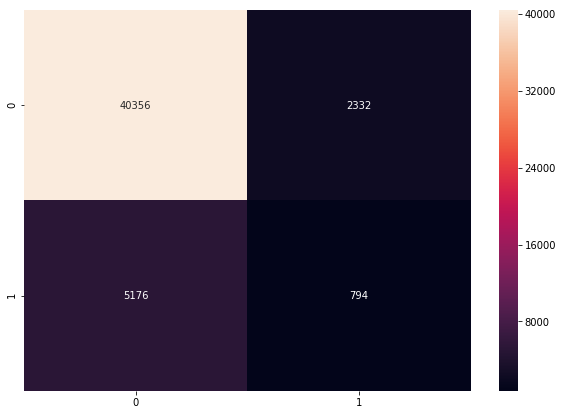

In [122]:
### plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

df_cm = pd.DataFrame(confusion_matrix(real_label, X_reduce['label']))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [123]:
(df_cm.iloc[0,0]+df_cm.iloc[1,1])/(np.sum(df_cm)[0]+np.sum(df_cm)[1])

0.8456985490566813

In [125]:
from sklearn.metrics import classification_report

print(classification_report(real_label, X_reduce['label']))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91     42688
           1       0.25      0.13      0.17      5970

   micro avg       0.85      0.85      0.85     48658
   macro avg       0.57      0.54      0.54     48658
weighted avg       0.81      0.85      0.82     48658

